## Step 1:- Reading and Understanding data
 - importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd

# Display all columns of the DataFrame when printing, without truncating
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Suppress warnings to keep the output clean and focus on the main results. 
# Ensure that no critical warnings are ignored that could affect the analysis.
import warnings
warnings.filterwarnings("ignore")

In [206]:
# # Loading the dataset and displaying the first few rows
df = pd.read_csv('day.csv')
df.head(100)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,06-04-2018,2,0,4,0,3,1,1,16.024153,19.38040,47.0833,17.625221,413,2395,2808
96,97,07-04-2018,2,0,4,0,4,1,1,17.937500,21.68480,60.2917,10.874904,571,2570,3141
97,98,08-04-2018,2,0,4,0,5,1,2,13.769153,16.22395,83.6250,15.208464,172,1299,1471
98,99,09-04-2018,2,0,4,0,6,0,2,14.042500,17.07645,87.7500,8.916561,879,1576,2455


In [128]:
df.shape

(730, 16)

In [129]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [130]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


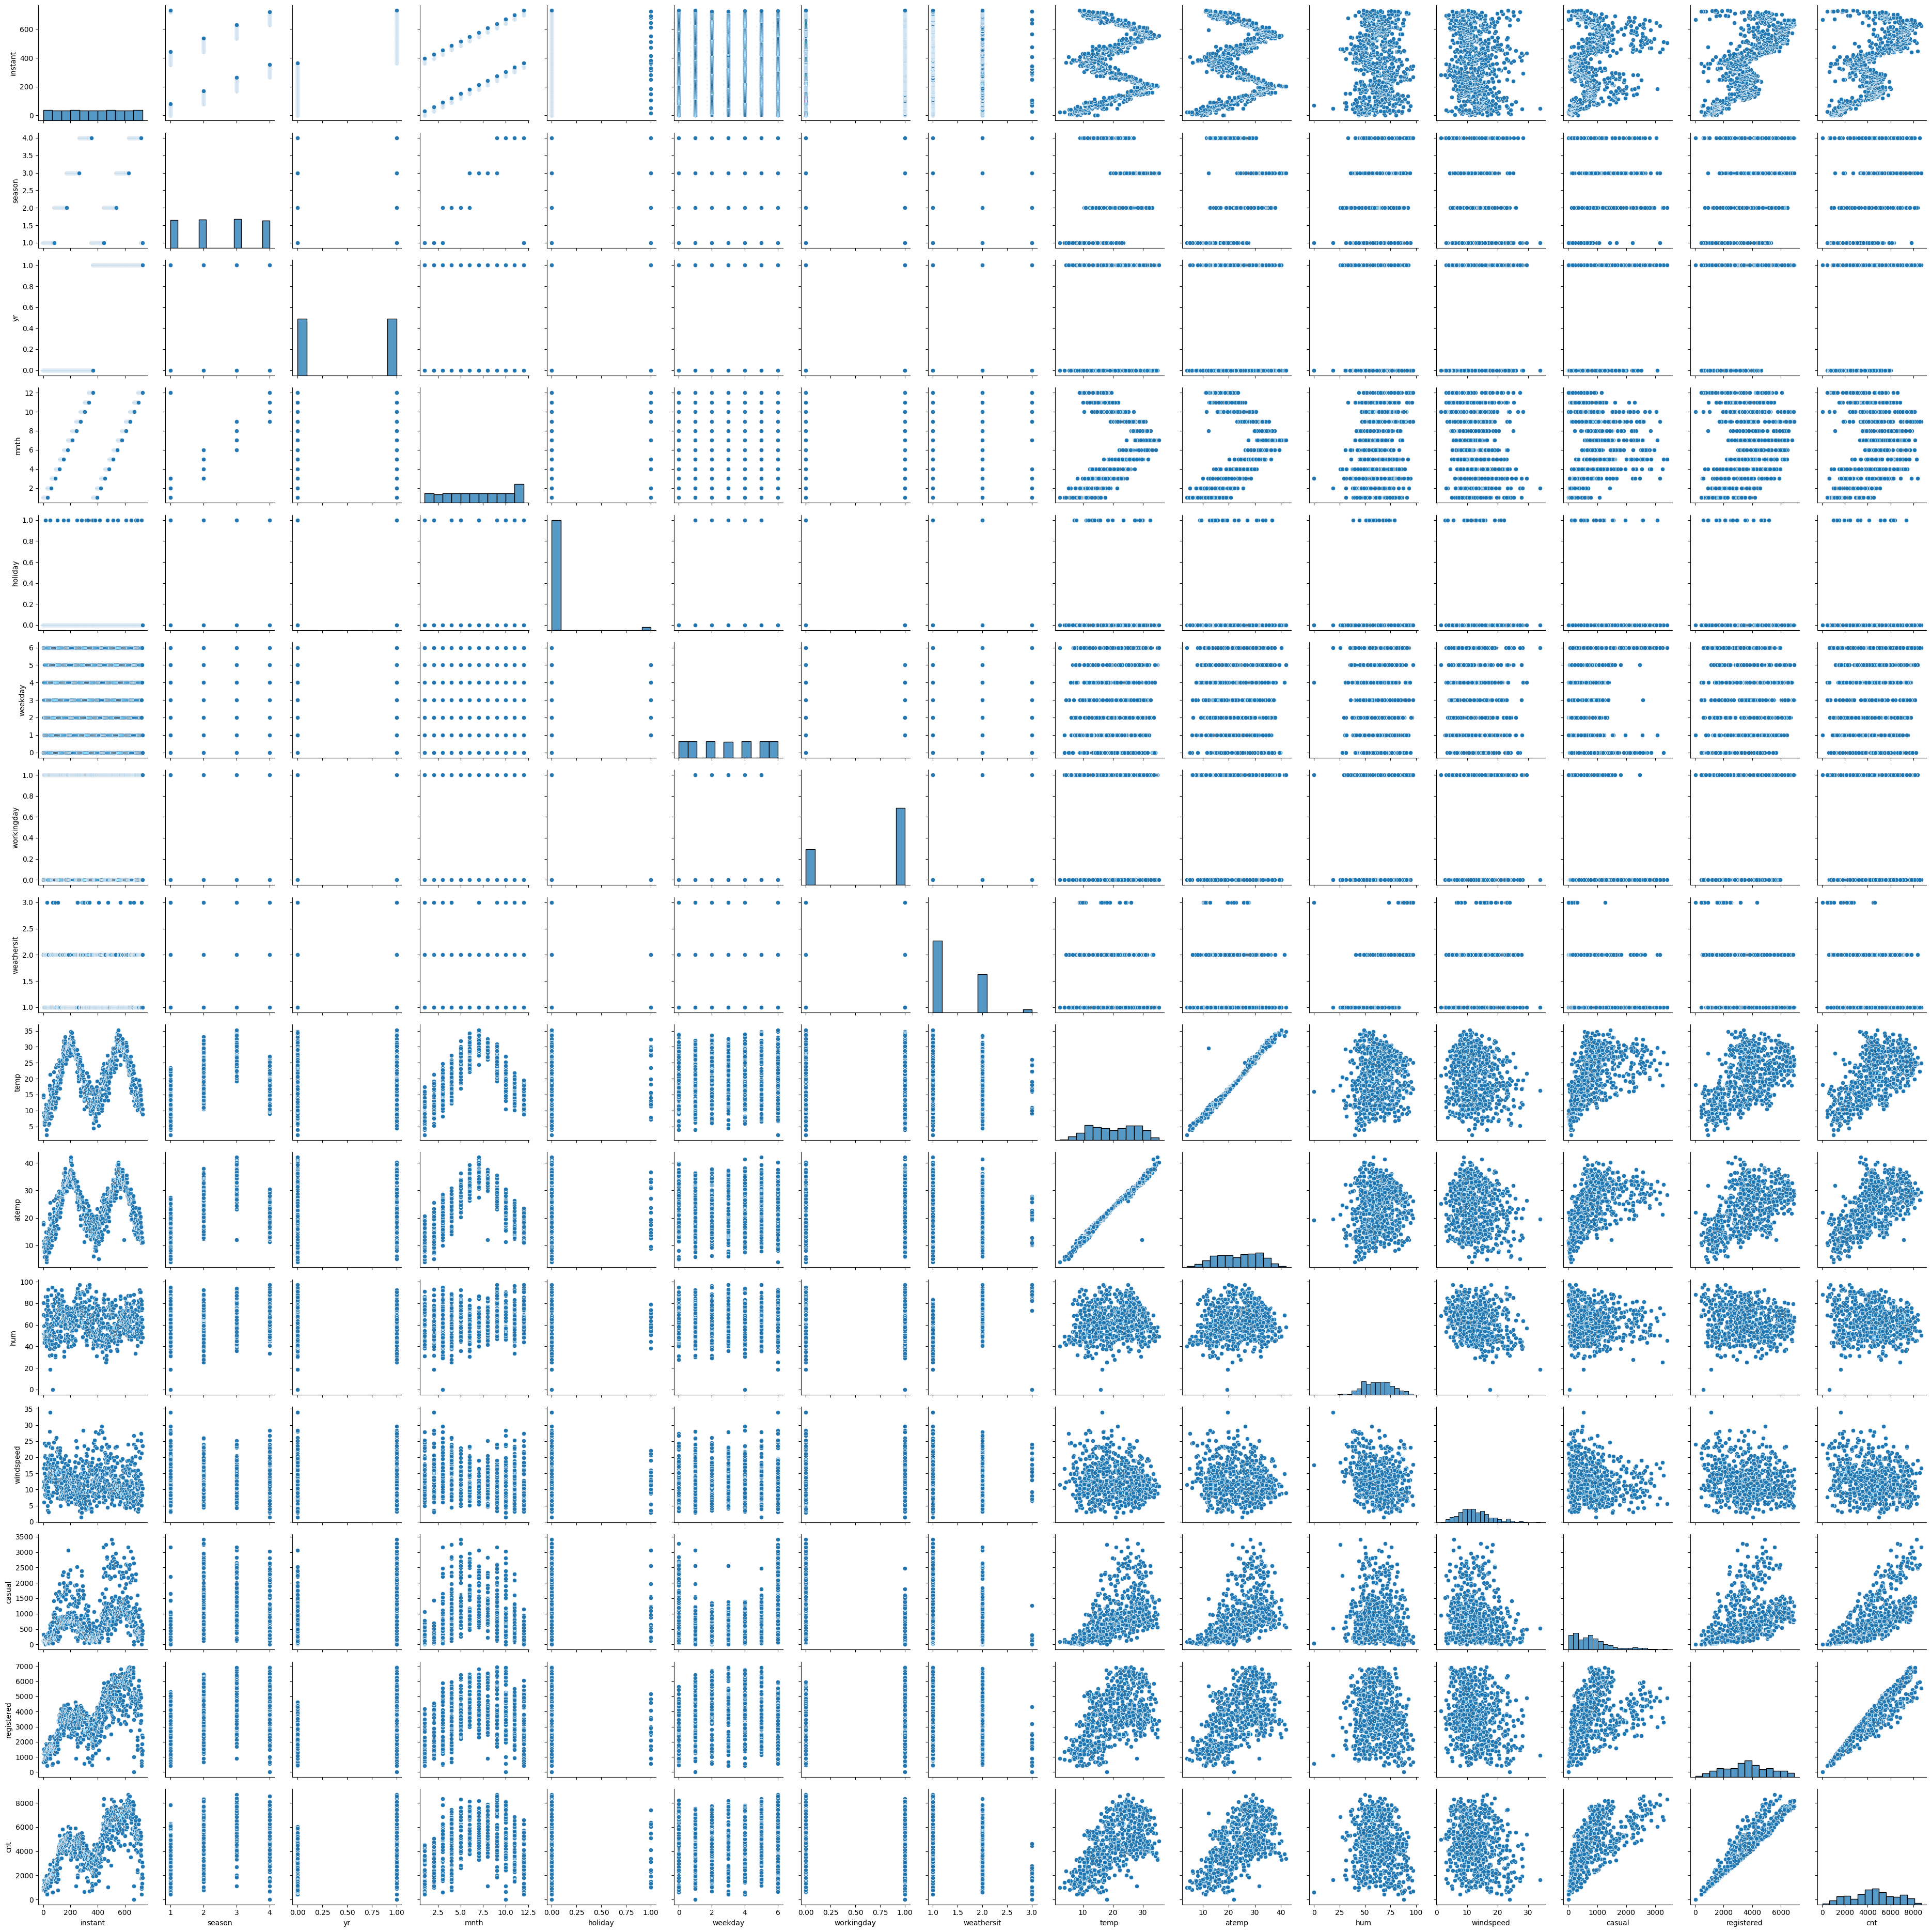

In [131]:
# Visualizing the numeric variables
sns.pairplot(df)
plt.tight_layout()
plt.show()

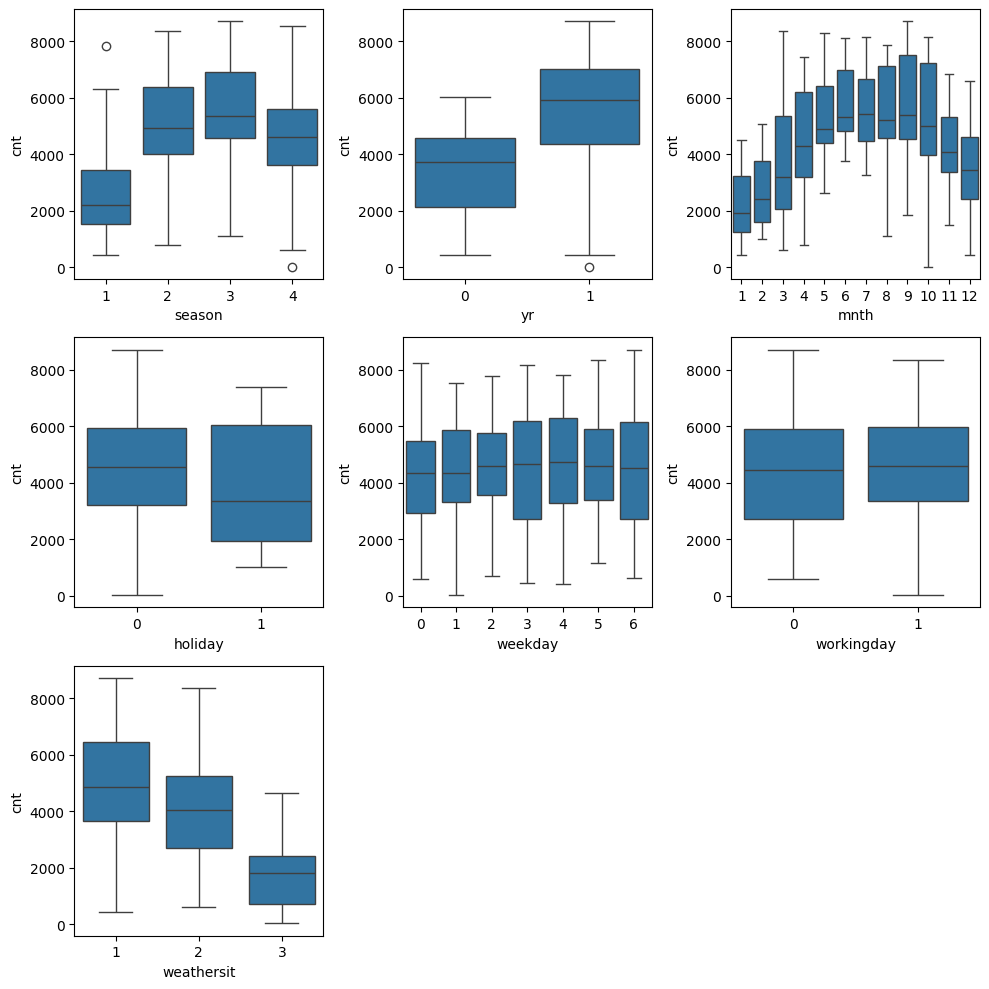

In [132]:
#Visualizing the categorical variables
plt.figure(figsize = (10,10))
plt.subplot(3,3,1)
sns.boxplot(x='season', y = "cnt", data = df)

plt.subplot(3,3,2)
sns.boxplot(x='yr', y = "cnt", data = df)

plt.subplot(3,3,3)
sns.boxplot(x='mnth', y = "cnt", data = df)

plt.subplot(3,3,4)
sns.boxplot(x='holiday', y = "cnt", data = df)

plt.subplot(3,3,5)
sns.boxplot(x='weekday', y = "cnt", data = df)

plt.subplot(3,3,6)
sns.boxplot(x='workingday', y = "cnt", data = df)

plt.subplot(3,3,7)
sns.boxplot(x='weathersit', y = "cnt", data = df)

plt.tight_layout()
plt.show()



## Step 2:- Preparing the data for modeling

In [207]:
# since we are having all the features related to date like month, Year, day, holiday there fore we can drop date column(dteday)
# "instant" representing index and has no predictive power hence dropping
# "cnt" Is sum of "casual" and "registered", hence these two varible will lead to multicollinearity hence dropping
df = df.drop(['dteday', 'instant', 'casual', 'registered'], axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Creating Dummy variabls

In [211]:
dummy_df = pd.get_dummies(df, columns = ['season', 'mnth', 'weekday', 'weathersit'], drop_first = True)
dummy_df = dummy_df.astype(int)
dummy_df.head(100)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14,18,80,10,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14,17,69,16,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8,9,43,16,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8,10,59,10,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9,11,43,12,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,1,16,19,47,17,2808,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
96,0,0,1,17,21,60,10,3141,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
97,0,0,1,13,16,83,15,1471,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
98,0,0,0,14,17,87,8,2455,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


 #### Splitting Data into Training and Testing Sets

In [212]:
df_train, df_test = train_test_split(dummy_df, train_size=0.7, random_state = 100)
print(df_train.shape)
print(df_test.shape)


(510, 30)
(220, 30)


#### Scaling of data

In [213]:
# 1. Instantiate an Object
scaler = MinMaxScaler()

#Create list of numeric variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

#2. Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
576,1,0,1,0.818182,0.769231,0.721649,0.28125,0.827658,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.424242,0.435897,0.639175,0.25000,0.465255,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.242424,0.205128,0.494845,0.65625,0.204096,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.393939,0.384615,0.494845,0.18750,0.482973,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
111,0,0,1,0.333333,0.333333,0.742268,0.37500,0.191095,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [139]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.533571,0.512217,0.645826,0.322917,0.513499,0.247059,0.262745,0.247059,0.066667,0.098039,0.078431,0.084314,0.076471,0.076471,0.096078,0.080392,0.084314,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.345098,0.029412
std,0.500429,0.157763,0.468282,0.225145,0.207737,0.145867,0.165495,0.224421,0.431725,0.440557,0.431725,0.249689,0.297660,0.269113,0.278131,0.266010,0.266010,0.294988,0.272166,0.278131,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.333333,0.333333,0.536082,0.218750,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.545455,0.538462,0.649485,0.312500,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.727273,0.692308,0.752577,0.406250,0.684710,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [140]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 576 to 520
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int32  
 1   holiday       510 non-null    int32  
 2   workingday    510 non-null    int32  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    float64
 8   season_2      510 non-null    int32  
 9   season_3      510 non-null    int32  
 10  season_4      510 non-null    int32  
 11  mnth_2        510 non-null    int32  
 12  mnth_3        510 non-null    int32  
 13  mnth_4        510 non-null    int32  
 14  mnth_5        510 non-null    int32  
 15  mnth_6        510 non-null    int32  
 16  mnth_7        510 non-null    int32  
 17  mnth_8        510 non-null    int32  
 18  mnth_9        510 non-null    int

## Step 3:- Training Model

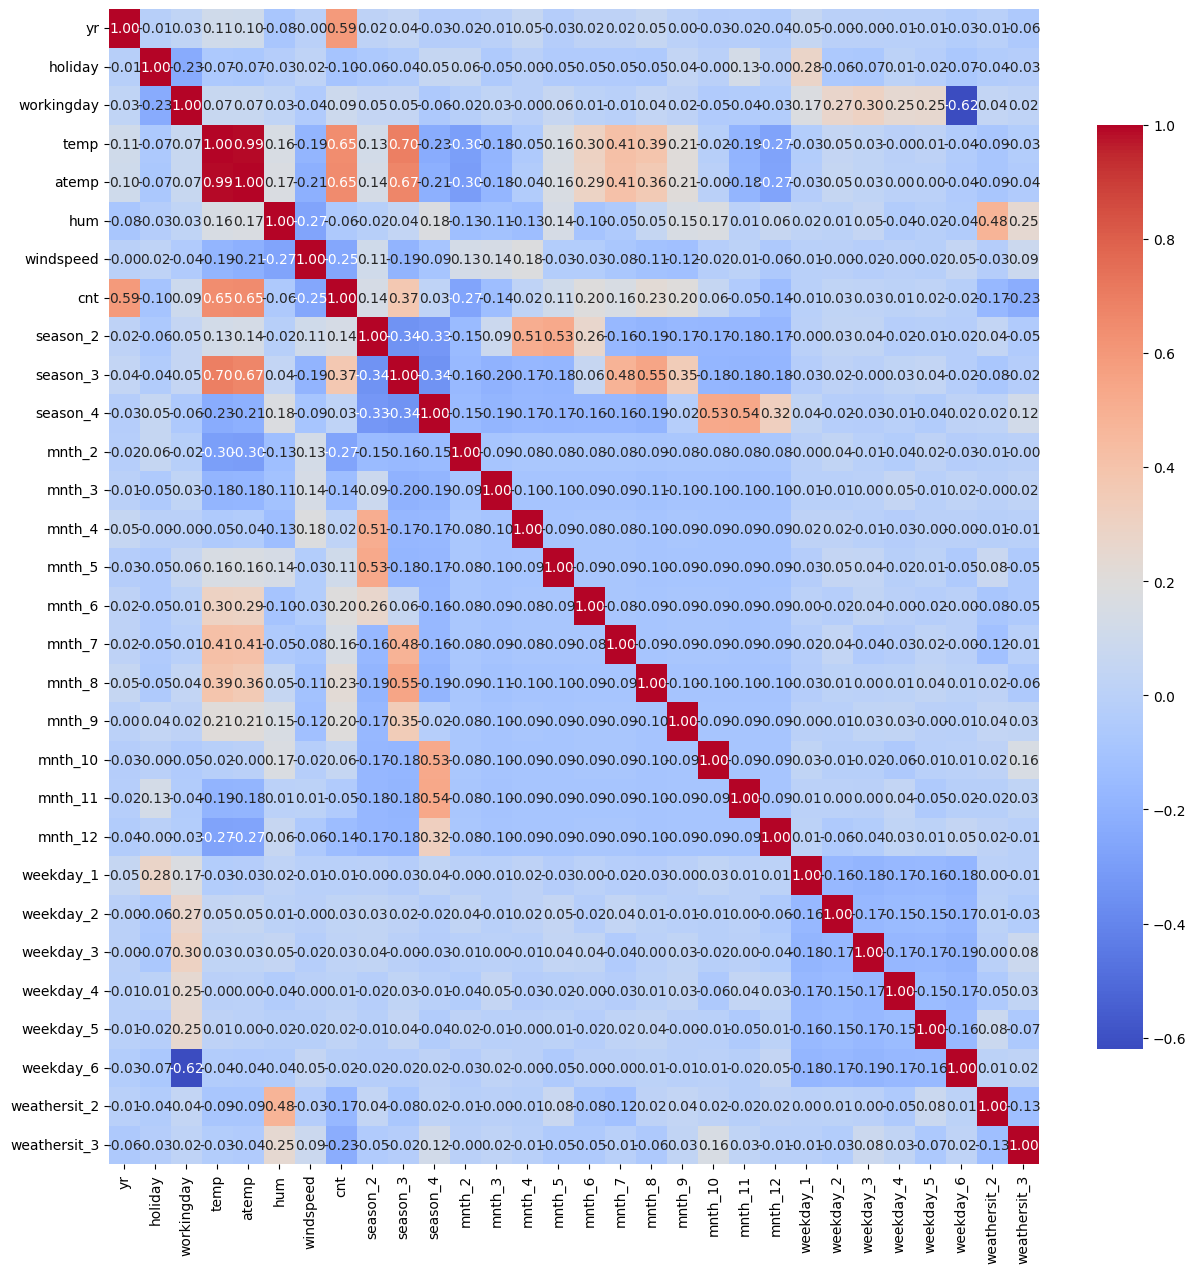

In [214]:
corr_matrix = df_train.corr()
base_width = 0.5  # base width per column
base_height = 0.5  # base height per row

width = corr_matrix.shape[1] * base_width
height = corr_matrix.shape[0] * base_height

min_width = 10
min_height = 8

figsize = (max(min_width, width), max(min_height, height))

# Plotting the heatmap with the calculated figsize
plt.figure(figsize=figsize)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={"shrink": 0.8})

plt.show()

#### Dividing training set into X and Y for model building

In [215]:
y_train = df_train.pop('cnt')
x_train = df_train

#### RFE
  - As we can see there are many columns, so I will take automatic feature elimination approch 
  - Through RFE we will bring down the number of features (course tuning)

In [216]:
# Running RFE with ouptput number of varibales equal to 20
# Instantiate the Linear Regression model
lm = LinearRegression()

# Instantiate RFE with the model and the number of features to select
rfe = RFE(estimator=lm, n_features_to_select=20)

# Fit the RFE model on the training data
rfe = rfe.fit(x_train, y_train)

In [217]:
list(zip(x_train.columns, rfe.support_,rfe.ranking_)) # listing top 20 features

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 4),
 ('mnth_3', False, 2),
 ('mnth_4', False, 7),
 ('mnth_5', False, 10),
 ('mnth_6', False, 5),
 ('mnth_7', True, 1),
 ('mnth_8', False, 3),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 6),
 ('mnth_12', False, 8),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', False, 9),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [145]:
col = x_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_2', 'season_3', 'season_4', 'mnth_7', 'mnth_9', 'mnth_10',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [146]:
x_train.columns[~rfe.support_]

Index(['mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_8', 'mnth_11',
       'mnth_12', 'weekday_6'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [147]:
# Creating X_test dataframe with RFE selected variables
x_train_rfe = x_train[col]


In [148]:
# Adding a constant variable

x_train_rfe = sm.add_constant(x_train_rfe)


In [149]:
lm = sm.OLS(y_train, x_train_rfe).fit()   # Running the linear model

In [150]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     139.7
Date:                Sat, 31 Aug 2024   Prob (F-statistic):          7.50e-184
Time:                        19:48:48   Log-Likelihood:                 512.95
No. Observations:                 510   AIC:                            -985.9
Df Residuals:                     490   BIC:                            -901.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2216      0.028      7.898   

#### Calculating VIF

In [221]:
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
24,weekday_4,inf
2,workingday,inf
23,weekday_3,inf
22,weekday_2,inf
21,weekday_1,inf
25,weekday_5,inf
1,holiday,inf
3,temp,384.10
4,atemp,345.32
5,hum,20.99


 - We have to eliminate the features which are having high p and high VIF value
     ##### Order of eliminating features
          1.Feature with High P value
          2.Feature with High P and Low VIF
          3.Feature with High VIF and Low P
          4.Feature with Low P and low VIF
     

In [220]:
x = x_train_rfe.drop('weekday_5', axis = 1)  # weekday_5 has high  p-value of 0.786 Hence dropping

KeyError: "['weekday_5'] not found in axis"

 - Creating another model

In [159]:
# Adding a constant variable
x_train_rfe = sm.add_constant(x)

lm = sm.OLS(y_train, x_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     139.7
Date:                Sun, 01 Sep 2024   Prob (F-statistic):          7.50e-184
Time:                        13:02:27   Log-Likelihood:                 512.95
No. Observations:                 510   AIC:                            -985.9
Df Residuals:                     490   BIC:                            -901.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2216      0.028      7.898   

In [163]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,temp,51.73
0,const,49.27
5,atemp,47.93
9,season_3,5.44
8,season_2,2.64
3,workingday,2.50
10,season_4,2.16
14,weekday_1,1.97
16,weekday_3,1.93
6,hum,1.91


In [165]:
x1 = x.drop('weekday_3', axis = 1)  # weekday_3 has high  p-value of 0.640 Hence dropping

 - Creating another model

In [166]:
# Adding a constant variable
x_train_rfe = sm.add_constant(x1)

lm = sm.OLS(y_train, x_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     147.7
Date:                Sun, 01 Sep 2024   Prob (F-statistic):          6.78e-185
Time:                        13:14:32   Log-Likelihood:                 512.84
No. Observations:                 510   AIC:                            -987.7
Df Residuals:                     491   BIC:                            -907.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2222      0.028      7.933   

In [167]:
vif = pd.DataFrame()
vif['Features'] = x1.columns
vif['VIF'] = [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,temp,51.65
0,const,49.17
5,atemp,47.81
9,season_3,5.44
8,season_2,2.64
10,season_4,2.16
6,hum,1.91
17,weathersit_2,1.57
3,workingday,1.52
13,mnth_10,1.52


In [222]:
x2 = x1.drop('weekday_4', axis = 1)  # weekday_4 has high  p-value of 0.617, Hence dropping

 - Creating another model

In [172]:
# Adding a constant variable
x_train_rfe = sm.add_constant(x2)

lm = sm.OLS(y_train, x_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     156.6
Date:                Sun, 01 Sep 2024   Prob (F-statistic):          6.04e-186
Time:                        20:06:15   Log-Likelihood:                 512.71
No. Observations:                 510   AIC:                            -989.4
Df Residuals:                     492   BIC:                            -913.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2221      0.028      7.936   

In [177]:
vif = pd.DataFrame()
vif['Features'] = x2.columns
vif['VIF'] = [variance_inflation_factor(x2.values, i) for i in range(x2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,temp,51.43
0,const,49.16
5,atemp,47.62
9,season_3,5.44
8,season_2,2.64
10,season_4,2.16
6,hum,1.91
16,weathersit_2,1.56
13,mnth_10,1.52
11,mnth_7,1.51


In [223]:
x3 = x2.drop('atemp', axis = 1)  # atemp has high  p-value of 0.485, Hence dropping

 - Creating another model

In [175]:
# Adding a constant variable
x_train_rfe = sm.add_constant(x3)

lm = sm.OLS(y_train, x_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     166.5
Date:                Sun, 01 Sep 2024   Prob (F-statistic):          5.87e-187
Time:                        20:14:00   Log-Likelihood:                 512.45
No. Observations:                 510   AIC:                            -990.9
Df Residuals:                     493   BIC:                            -918.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2247      0.028      8.103   

In [179]:
vif = pd.DataFrame()
vif['Features'] = x3.columns
vif['VIF'] = [variance_inflation_factor(x3.values, i) for i in range(x3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,48.30
8,season_3,5.37
4,temp,3.80
7,season_2,2.64
9,season_4,2.16
5,hum,1.91
15,weathersit_2,1.56
12,mnth_10,1.52
10,mnth_7,1.50
11,mnth_9,1.31


In [224]:
x4 = x3.drop('weekday_2', axis = 1)  # weekday_2 has high  p-value of 0.360, Hence dropping

 - Creating another model

In [181]:
# Adding a constant variable
x_train_rfe = sm.add_constant(x4)

lm = sm.OLS(y_train, x_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     177.6
Date:                Sun, 01 Sep 2024   Prob (F-statistic):          6.56e-188
Time:                        20:18:56   Log-Likelihood:                 512.02
No. Observations:                 510   AIC:                            -992.0
Df Residuals:                     494   BIC:                            -924.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2257      0.028      8.146   

In [182]:
vif = pd.DataFrame()
vif['Features'] = x4.columns
vif['VIF'] = [variance_inflation_factor(x4.values, i) for i in range(x4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,48.23
8,season_3,5.37
4,temp,3.80
7,season_2,2.64
9,season_4,2.16
5,hum,1.91
14,weathersit_2,1.56
12,mnth_10,1.52
10,mnth_7,1.49
11,mnth_9,1.31


In [225]:
x5 = x4.drop('weekday_1', axis = 1)  # weekday_1 has high  p-value of 0.272, Hence dropping

### Final Model

In [184]:
# Adding a constant variable
x_train_rfe = sm.add_constant(x5)

lm = sm.OLS(y_train, x_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.2
Date:                Sun, 01 Sep 2024   Prob (F-statistic):          8.52e-189
Time:                        20:22:01   Log-Likelihood:                 511.40
No. Observations:                 510   AIC:                            -992.8
Df Residuals:                     495   BIC:                            -929.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2265      0.028      8.179   

In [185]:
vif = pd.DataFrame()
vif['Features'] = x5.columns
vif['VIF'] = [variance_inflation_factor(x5.values, i) for i in range(x5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,48.19
8,season_3,5.36
4,temp,3.79
7,season_2,2.63
9,season_4,2.16
5,hum,1.90
13,weathersit_2,1.56
12,mnth_10,1.52
10,mnth_7,1.49
11,mnth_9,1.31


- the "workingday" feature is kept because it has practical importance and contributes to the model’s predictive power, 
even if its p-value is slightly above the 0.05 threshold.

In [198]:
column_list = x5.columns.tolist()
print(column_list)

['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2', 'season_3', 'season_4', 'mnth_7', 'mnth_9', 'mnth_10', 'weathersit_2', 'weathersit_3']


## Step 4:- Residual Analysis

In [188]:
y_train_pred = lm.predict(x_train_rfe)
y_train_pred

576    0.724461
426    0.460495
728    0.372031
482    0.596780
111    0.275561
         ...   
578    0.818811
53     0.252783
350    0.260491
79     0.306758
520    0.663427
Length: 510, dtype: float64

<Axes: ylabel='Density'>

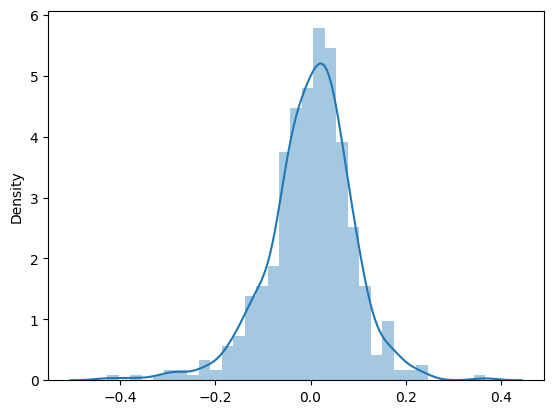

In [189]:
res = y_train - y_train_pred
sns.distplot(res)

As we can see residual terms are normally distributed and centered around zero

#### Step 5:- predictions and Evalutions on the Test set

In [190]:
#Create list of numeric variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

#2. Fit on data
#Scaler.fit

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,0.818182,0.769231,0.649485,0.09375,0.692706,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.909091,0.846154,0.608247,0.15625,0.712034,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.515152,0.487179,0.835052,0.34375,0.303382,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.878788,0.794872,0.432990,0.34375,0.547400,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.818182,0.743590,0.309278,0.53125,0.569029,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [191]:
df_test.describe

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.553857,0.532634,0.633646,0.315625,0.522154,0.263636,0.245455,0.236364,0.100000,0.054545,0.090909,0.086364,0.095455,0.104545,0.059091,0.086364,0.086364,0.072727,0.086364,0.127273,0.168182,0.100000,0.163636,0.177273,0.118182,0.318182,0.027273
std,0.500809,0.187620,0.459303,0.232754,0.212565,0.148671,0.154914,0.219163,0.441609,0.431338,0.425817,0.300684,0.227609,0.288135,0.281541,0.294512,0.306665,0.236333,0.281541,0.281541,0.260281,0.281541,0.334038,0.374881,0.300684,0.370789,0.382770,0.323559,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.030303,0.025641,0.257732,-0.031250,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.363636,0.358974,0.523196,0.218750,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.545455,0.538462,0.618557,0.312500,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.757576,0.717949,0.742268,0.406250,0.677750,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.969697,0.974359,1.000000,0.781250,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [192]:
y_test = df_test.pop("cnt")
x_test = df_test



In [195]:
# add a constant
x_test_sm = sm.add_constant(x_test)
x_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,1.0,0,1,0,0.818182,0.769231,0.649485,0.09375,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
535,1.0,1,0,1,0.909091,0.846154,0.608247,0.15625,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
299,1.0,0,0,1,0.515152,0.487179,0.835052,0.34375,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
221,1.0,0,0,1,0.878788,0.794872,0.432990,0.34375,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
152,1.0,0,0,1,0.818182,0.743590,0.309278,0.53125,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [200]:
x_test_sm = x_test_sm[['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2', 'season_3', 'season_4', 'mnth_7', 'mnth_9', 'mnth_10', 'weathersit_2', 'weathersit_3']]
x_test_sm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_2,season_3,season_4,mnth_7,mnth_9,mnth_10,weathersit_2,weathersit_3
184,1.0,0,1,0,0.818182,0.649485,0.09375,0,1,0,1,0,0,1,0
535,1.0,1,0,1,0.909091,0.608247,0.15625,1,0,0,0,0,0,0,0
299,1.0,0,0,1,0.515152,0.835052,0.34375,0,0,1,0,0,1,1,0
221,1.0,0,0,1,0.878788,0.432990,0.34375,0,1,0,0,0,0,0,0
152,1.0,0,0,1,0.818182,0.309278,0.53125,1,0,0,0,0,0,0,0


In [202]:
#predict
y_test_pred = lm.predict(x_test_sm)
y_test_pred.head()

184    0.387255
535    0.916318
299    0.422647
221    0.617616
152    0.623614
dtype: float64

In [204]:
# Evaluate
r2_score(y_true = y_test, y_pred = y_test_pred)

0.8199850178734814